### Generics

In [541]:
import string
import numpy as np
import matplotlib.pyplot as plt

In [542]:
phrase = "To be, or not to be, that is the question"


In [543]:
phrase = "Heuristicas e Metaheuristicas"

In [544]:
phrase_list = [i for i in phrase]

In [545]:
def generate_random_solution(size , bin_str_size = 7):
    phrase = ''
    for letter in range(size):
        binary_letter_string = "".join(str(np.random.randint(0,2)) for i in range(bin_str_size))
        phrase = phrase + binary_letter_string
    return phrase

In [546]:
solution = generate_random_solution(len(phrase))
solution

'10111101001100010010101001000011101101111010101010100100110000100100111011000101010101110110010101001001001110000010100010100100011101011000001011000011101100100001011110011111111010000001011000001000111'

In [547]:
int("1111111", 2)

127

In [548]:
all_letters = string.printable[0:95]
#all_letters = string.printable[10:36]
print(all_letters)
print(len(all_letters))

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 
95


In [549]:
#The scaler does not limit the max value,
#Instead it map the possible values in 
#The binary string 1111111 from [0, 127] to [0, 94]
#If we use a binary string 11111111 for ex [0, 255]
#The result would be 189 and we must clamp it if needed
#scale(int('11111111', 2))
# -> 189
def scale(value, new_min = 0, new_max = 94, old_max = 127):
#def scale(value, new_min = 0, new_max = 25, old_max = 31):
    return np.round(((value - 0) / (old_max - 0)) * (new_max - new_min) + new_min)

In [550]:
def inverse_scale(scaled_value, new_min=0, new_max=94, old_max=127, old_min=0):
#def inverse_scale(scaled_value, new_min=0, new_max=25, old_max=31, old_min=0):
    return np.round(((scaled_value - new_min) / (new_max - new_min)) * (old_max - old_min) + old_min)

In [551]:
def decode_binary_to_phrase(solution, bin_str_size = 7):
    phrase = ""
    for pos in range(0, len(solution), bin_str_size):
        binary_letter = str(solution[pos: pos+bin_str_size])
        #if int(binary_letter, 2) > 94:
        #    int_value = 94
        #else:
        #    int_value = int(binary_letter, 2)
        
        int_value = int(scale(int(binary_letter, 2)))
        
        letter = all_letters[int_value]
        phrase = phrase + letter 
    return phrase

In [552]:
solution_phrase = decode_binary_to_phrase(solution)
solution_phrase

')Urrl)"r+e$"IgdFfua$ga-hW{1*R'

In [553]:
def solution_score(phrase, solution_phrase):
    phrase_list = [i for i in phrase]
    solution_list = [i for i in solution_phrase]    
    score = 0
    for letter_pos in range(len(phrase)):
        if solution_list[letter_pos] == phrase_list[letter_pos]:
            score += 1
            
    if score == 0:
        score = 0.0001
    else:
        score = (score / len(phrase))
        
    return 1 - score

In [554]:
score = solution_score(phrase, solution_phrase)
score

0.9655172413793104

In [555]:
text_list = []
for i in range(100):
    solution = generate_random_solution(len(phrase))
    print(solution)
    solution_phrase = decode_binary_to_phrase(solution)
    print(solution_phrase)
    score = solution_score(phrase, solution_phrase)
    print(score)
    text_list.append(solution_phrase)
    print("_"*100 + '\n')

10101111001111011010000110100001100100000001100001101001010101010100011100000011011010010000100011000110100110111001001111100010111011000000110100101001101110011111000111001001010111010010110111100101000
#WCj9LA;vY*ERqakS`(L;s\[-#r)u
0.9999
____________________________________________________________________________________________________

10011010101111100001000100000011100011011010001111111010010101111000110101110010011010110011000011010110100100010000111100011000101110111001111010011001110100001001001101111100101000110110011001010110010
VzNclER{w,ys%Oxd5QhG]/oeKu=.B
0.9655172413793104
____________________________________________________________________________________________________

00101100100000001100010100011001010011011010100100111100010001000010101111100100100011011100010111010001011110100111110111010111010010010111111011000001001001011010011010010000010011110101010100000101110
goiYTEZIp7}R>hp{K^;h^3UsRe;Xy
0.9655172413793104
_________________________________________________

In [556]:
from PIL import ImageDraw, ImageFont
from PIL import Image as IMG
import os

def string_to_image(text, image_size=(500, 100), font_size=20):
    # Create a new image with a white background
    image = IMG.new("RGB", image_size, "white")
    draw = ImageDraw.Draw(image)

    # You can customize the font and its size
    font = ImageFont.truetype("arial.ttf", font_size)

    # Calculate the text size and position it in the center
    text_width, text_height = draw.textsize(text, font)
    x = (image_size[0] - text_width) / 2
    y = (image_size[1] - text_height) / 2

    # Draw the text on the image
    draw.text((x, y), text, fill="black", font=font)

    return image

In [557]:
import imageio
from IPython.display import display, Image

def generate_GIF(text_list, gif_name = 'output', seconds_per_frame = 0.1):
    image_folder = "temp_images"
    os.makedirs(image_folder, exist_ok=True);

    image_files = []

    for i, text in enumerate(text_list):
        image = string_to_image(text);
        image_file = os.path.join(image_folder, f"image_{i}.png");
        image.save(image_file);
        image_files.append(image_file);



    output_gif = gif_name+".gif"
    images = [imageio.imread(image_file) for image_file in image_files]
    imageio.mimsave(output_gif, images, duration=seconds_per_frame);  # Set the duration (in seconds) per frame

    # Clean up temporary image files
    for image_file in image_files:
        os.remove(image_file);

    #print(f"GIF saved to {output_gif}")


    # Path to your GIF file
    gif_path = gif_name+".gif"

    # Display the GIF
    display(Image(filename=gif_path));

C:\Users\Felps\AppData\Local\Temp\ipykernel_8936\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_8936\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_8936\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_8936\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Fel

C:\Users\Felps\AppData\Local\Temp\ipykernel_8936\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_8936\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_8936\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_8936\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Fel

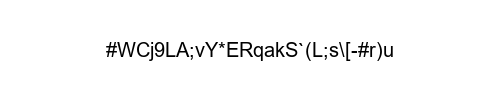

In [558]:
generate_GIF(text_list);

In [559]:
#Select a initial Solution
initial_solution = generate_random_solution(len(phrase))

In [560]:
len(initial_solution)

203

In [561]:
def perturbate_solution(s, n):
    for i in range(n):
        pos = np.random.choice(len(s))
        
        binary_list = list(s)
        
        if binary_list[pos] == '0':
            binary_list[pos] = '1'
        else:
            binary_list[pos] = '0'
        
        s = ''.join(binary_list)
    
    return s

In [562]:
initial_solution == perturbate_solution(initial_solution, 1)

False

In [563]:
def generate_neighborhood(n_neighbors, current_solution):
    neighborhood = []
    for i in range(n_neighbors):
        new_solution = current_solution
        while((new_solution in neighborhood) or (new_solution == current_solution)):
            new_solution = perturbate_solution(current_solution, 1)
        neighborhood.append(new_solution)
    return neighborhood

In [564]:
generate_neighborhood(5, initial_solution)

['00101001000101000100110110011010101001100101101011000110101100110001100110000010011111011111011100100111010100111001101000111110011011001010100000111010011101011000001111011000100101110011111011000101111',
 '00101001001101000100110110011010101001100101101011000110101100110001100110000010011111011111011100100111010100111001101000111110011001001010100000111010011101011000001111011000100101110011111011000101111',
 '00101001001101000100110110011010101001100101101011000110101100110001100110000110011111011111011100100111010100111001101000111110011011001010100000111010011101011000001111011000100101110011111011000101111',
 '00101001001101000100110110011010101001100101101011000110101100110001100110000010011111011111011100100111010100111001101001111110011011001010100000111010011101011000001111011000100101110011111011000101111',
 '0010100100110100010011011001101010100110010110101100011010110011000110011000001001111101111101110010011101010010100110100011111001101100101010000011101001110101100000

In [565]:
def update_tabu_list(tabu_list, max_length, solution):
    if max_length == len(tabu_list):
        tabu_list.pop()
        tabu_list.insert(0, solution)
    else:
        tabu_list.append(solution)
        
    return tabu_list

In [566]:

def encode_phrase_to_bin(phrase, bin_str_size = 7):

    str_list = [i for i in phrase]

    final_string = ''
    for idx in range(len(str_list)):
        letter = str_list[idx]
        integer_representation = all_letters.index(letter)
        binary_string = bin(int(inverse_scale(integer_representation)))[2:].zfill(bin_str_size) 
        final_string += binary_string
    return final_string

In [567]:
encode_phrase_to_bin('hello')

'00101110010011001110000111000100000'

In [568]:
decode_binary_to_phrase('00101110010011001110000111000100000')

'hello'

In [569]:
np.random.rand()

0.23029437515350693

In [570]:
def tabu_search(max_iterations, n_neighbors, early_stop_n, tabu_list_len, phrase):
    bin_phrase = encode_phrase_to_bin(phrase)
    tabu_list, bin_list, bin_bests, score_list, best_scores, mean_scores = [], [], [], [], [], []

    s0 = generate_random_solution(len(phrase)) #Initial Solution
    best_score = solution_score(bin_phrase, s0)
    best_solution = s0
    iteration, best_iteration = 0, 0
    
    while (iteration <= max_iterations) and (iteration - best_iteration <= early_stop_n):
        #Neighborhood and scores
        neighborhood = generate_neighborhood(n_neighbors, s0)
        neighbors_scores = [solution_score(bin_phrase, neighbor) for neighbor in neighborhood]
        min_neighbor_score =  min(neighbors_scores)
        best_neighbor = neighborhood[neighbors_scores.index(min_neighbor_score)]
        
        if (best_neighbor not in tabu_list) or (min_neighbor_score <= best_score):
            tabu_list = update_tabu_list(tabu_list, tabu_list_len, best_neighbor)
            s0, s0_score = best_neighbor, min_neighbor_score
            bin_list.append(s0)
            score_list.append(s0_score)
            mean_scores.append(np.mean(neighbors_scores))
            if s0_score <= best_score:
                best_score = s0_score
                best_solution = s0
                best_iteration = iteration
                bin_bests.append(best_solution)
                best_scores.append(best_score)
            
        
        iteration += 1
        
    return best_solution, best_score, bin_list, score_list, bin_bests, best_scores, mean_scores


In [571]:
best_solution, best_score, bin_list, score_list, bin_bests, best_scores, mean_scores = tabu_search(max_iterations = 2000, n_neighbors = 150, early_stop_n = 30, tabu_list_len = 50, phrase = phrase)

In [572]:
min_score = min(score_list)
index_min = score_list.index(min_score)
bin_list_to_gif = bin_list[:index_min]

print(min_score, index_min)

0.0 98


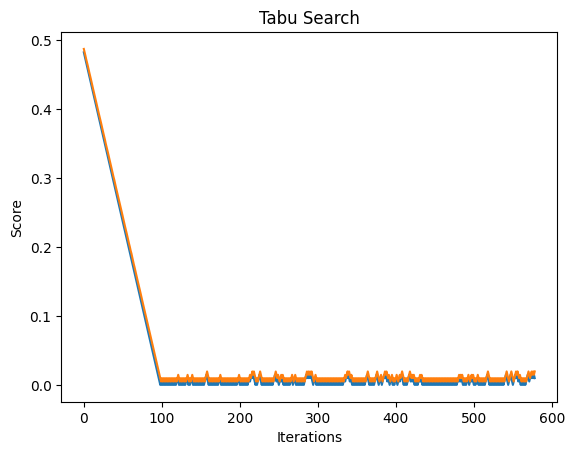

In [573]:
plt.plot(score_list);
plt.plot(mean_scores);
plt.title("Tabu Search");
plt.xlabel("Iterations");
plt.ylabel("Score");

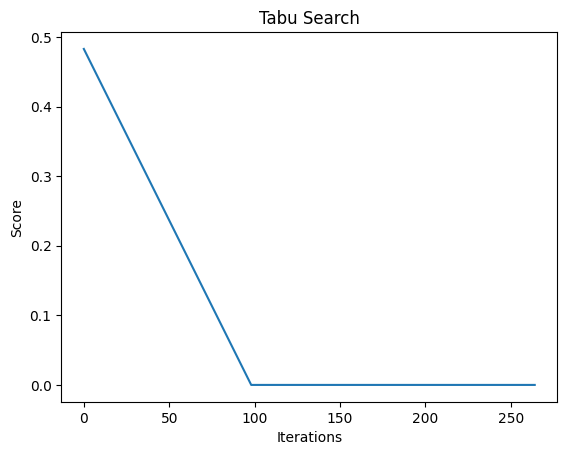

In [574]:
plt.plot(best_scores);
plt.title("Tabu Search");
plt.xlabel("Iterations");
plt.ylabel("Score");

C:\Users\Felps\AppData\Local\Temp\ipykernel_8936\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_8936\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_8936\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_8936\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Fel

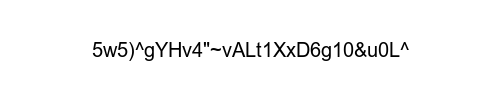

In [575]:
text_list = [decode_binary_to_phrase(bin_string) for bin_string in bin_list_to_gif]
generate_GIF(text_list, gif_name = 'TsEasy', seconds_per_frame= 0.001);

In [576]:
#Alterando a função objetivo para cada Letra correta 
def solution_score(phrase, individual_phrase):
    phrase_list = [i for i in phrase]
    individual_list = [i for i in individual_phrase]    
    score = 0
    for letter_pos in range(len(phrase)):
        if individual_list[letter_pos] == phrase_list[letter_pos]:
            score += 1
            
    score = (score / len(phrase))
        
    return 1 - score

In [577]:
def tabu_search(max_iterations, n_neighbors, early_stop_n, tabu_list_len, phrase):
    #bin_phrase = encode_phrase_to_bin(phrase)
    tabu_list, bin_list, bin_bests, score_list, best_scores, mean_scores = [], [], [], [], [], []

    s0 = generate_random_solution(len(phrase)) #Initial Solution
    best_score = solution_score(phrase, decode_binary_to_phrase(s0))
    best_solution = s0
    iteration, best_iteration = 0, 0
    
    while (iteration <= max_iterations) and (iteration - best_iteration <= early_stop_n):
        #Neighborhood and scores
        neighborhood = generate_neighborhood(n_neighbors, s0)
        neighbors_scores = [solution_score(phrase, decode_binary_to_phrase(neighbor)) for neighbor in neighborhood]
        min_neighbor_score =  min(neighbors_scores)
        best_neighbor = neighborhood[neighbors_scores.index(min_neighbor_score)]
        
        if (best_neighbor not in tabu_list) or (min_neighbor_score <= best_score):
            tabu_list = update_tabu_list(tabu_list, tabu_list_len, best_neighbor)
            s0, s0_score = best_neighbor, min_neighbor_score
            bin_list.append(s0)
            score_list.append(s0_score)
            mean_scores.append(np.mean(neighbors_scores))
            if s0_score <= best_score:
                best_score = s0_score
                best_solution = s0
                best_iteration = iteration
                bin_bests.append(best_solution)
                best_scores.append(best_score)
            
        iteration += 1
        
    return best_solution, best_score, bin_list, score_list, bin_bests, best_scores, mean_scores


In [578]:
best_solution, best_score, bin_list, score_list, bin_bests, best_scores, mean_scores = tabu_search(max_iterations = 1000, n_neighbors = 150, early_stop_n = 15, tabu_list_len = 50, phrase = phrase)

0.0 599


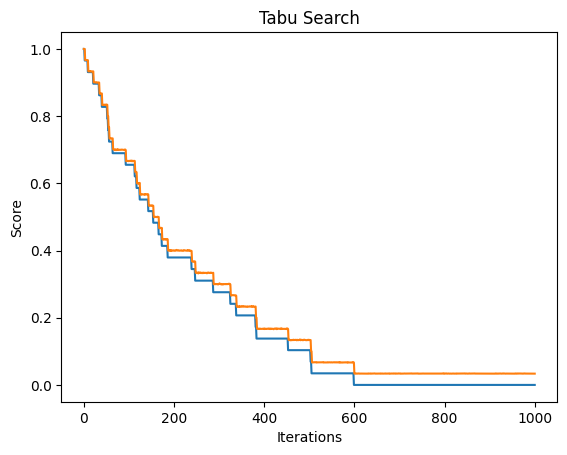

In [579]:
min_score = min(score_list)
index_min = score_list.index(min_score)
bin_list_to_gif = bin_list[:index_min]

print(min_score, index_min)

plt.plot(score_list);
plt.plot(mean_scores);
plt.title("Tabu Search");
plt.xlabel("Iterations");
plt.ylabel("Score");

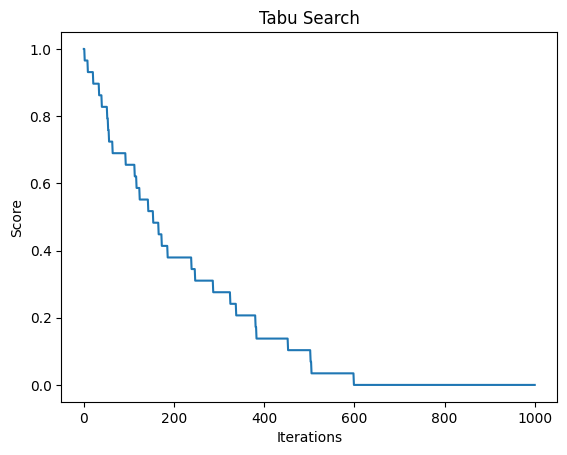

In [580]:
plt.plot(best_scores);
plt.title("Tabu Search");
plt.xlabel("Iterations");
plt.ylabel("Score");

C:\Users\Felps\AppData\Local\Temp\ipykernel_8936\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_8936\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_8936\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_8936\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Fel

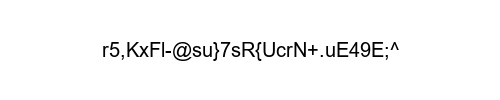

In [581]:
text_list = [decode_binary_to_phrase(bin_string) for bin_string in bin_list_to_gif]
generate_GIF(text_list, gif_name = 'TsHard', seconds_per_frame= 0.001);